In [19]:
#importing needed packages
%matplotlib ipympl
import matplotlib.pyplot as plt
import indentoolbox as itb #here the core module of itb package is imported
import os
import numpy as np

# Example supported thin film nanoindentation

An ITO based thin film has been deposited on glass substrate.
In this example we illustrate how indentoolbox can be used to load and plot data.

## nominal substrate elastic properties
Young's modulus E = 71 GPa
Poisson's ratio nu = 0.22

## import from Ti950 nanoindenter


### tip selection

In [20]:
#creating a black set-up
setup = {}

# most of commercial software express tip coefficients by a fit of contact ares in nm² and contact depth in nm
# TODO: add utility function
# coefficients in "nm" format
ti_coefficients = np.array([2.598, 4063.401407, -276548.367122, 2862958.007799, -7318518.1323, 4766427.475016])
max_im1 = len(ti_coefficients)
i = np.arange(max_im1)
pov = np.power(2*np.ones(max_im1), 1-i)
# coefficients in "m" format
coefficients = list(ti_coefficients * np.power(10**9, pov))

#selecting tip
setup["tip"] = itb.core.PyramidTip(coefficients = coefficients, 
                                   young_modulus=1141.0e9, 
                                   poisson_coefficient=0.07)


In [21]:
#protocol = None # If left to None, the test protocol will be inferred by the parser.
protocol = 3 * [None] + ["ConicalLoadingStep", "Step", "UnloadingStep"] # Use your own protocol: None ignores a step and otherwise a class name is provided
protocol

[None, None, None, 'ConicalLoadingStep', 'Step', 'UnloadingStep']

### files import

In [22]:
folder = "datasets/Hysitron_TI950/ITO_180nm_supported_on_glass/"
pathes = [f for f in os.listdir(folder) if f.endswith(".txt")]

In [38]:
file_format = "hysitron nano"
encoding = "ISO-8859-1"

c_dir = os.getcwd()
tests = []
os.chdir(folder)
for path in pathes:
    data = open(path, "rb").read().decode(encoding)
    test = itb.core.Test.from_txt(
                content=data, protocol=protocol, file_format=file_format)
    tests.append(test)

os.chdir(c_dir)

display(type(tests[0]))

indentoolbox.core.Test

## Sample


In [24]:
sample = itb.core.Sample(name = "Cautla production sample, naber treated", provider = "Sandra Flores")
setup["sample"] = sample
display(sample)

Sample(name='Cautla production sample, naber treated', provider='Sandra Flores')

## Device

In [25]:
device = itb.core.Device(name = "Ti-960", institute = "Saint-Gobain Research Paris", compliance = 0., provider = "Hysitron")
setup["device"] = device

In [26]:
## Creating batch

In [27]:
setup["tests"] = tests
batch = itb.core.Batch(**setup)

## Basic Plots

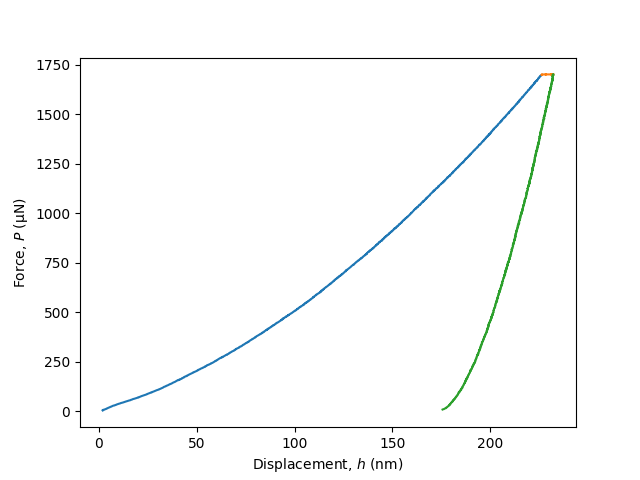

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for step in batch.tests[-1].steps:
    ax.plot(step.data['disp']*1e9, step.data['force']*1e6)
    
ax.set_xlabel("Displacement, $h$ (nm)")
ax.set_ylabel("Force, $P$ (µN)")
plt.show()

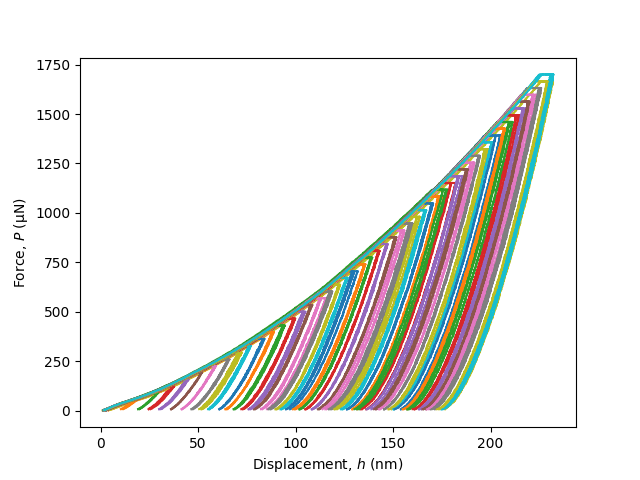

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for test in batch.tests:
    ax.plot(test.data['disp']*1e9, test.data['force']*1e6)

ax.set_xlabel("Displacement, $h$ (nm)")
ax.set_ylabel("Force, $P$ (µN)")
plt.show()

In [30]:
unloading_data = batch.collect_steps(2).unloading_fit()

first test of Oliver and Pharr analysis gives weird data. I compare the stiffness obtained with Triboscan and IndenToolbox

comparing stiffnesses by Triboscan and IntenToolBox


In [31]:
OP = itb.processing.OliverPharr(data = unloading_data, tip = batch.tip, epsilon = 0.75, beta = 1)

## Plotting Oliver-Pharr results

comparing hc and contact areaa obtained from Triboscan and from IndenToolBox

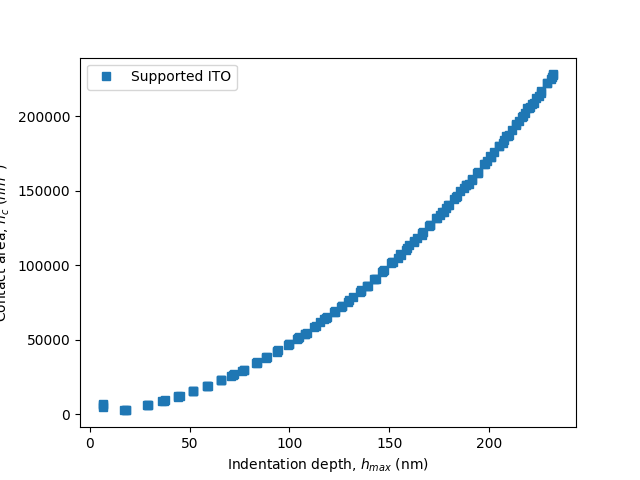

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(OP['h']*1e9, OP['Ac'], 's', label='Supported ITO')

ax.set_xlabel("Indentation depth, $h_{max}$ (nm)")
ax.set_ylabel("Contact area, $h_{c}$ ($nm^2$)")
ax.legend()
plt.show()

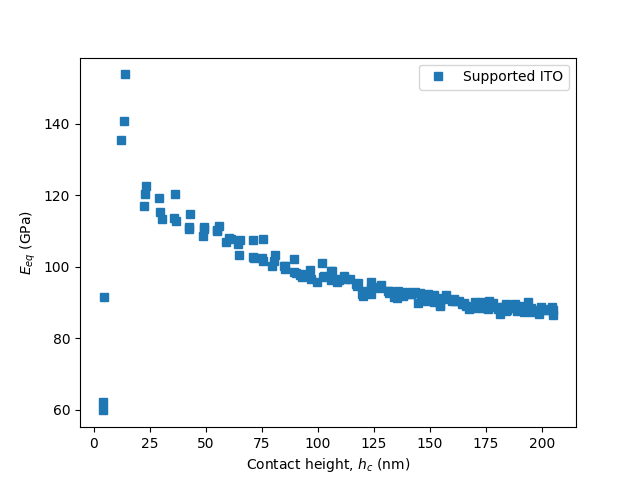

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(OP['hc']*1e9, OP['Eeqsamp'], 's', label='Supported ITO')

ax.set_xlabel("Contact height, $h_c$ (nm)")
ax.set_ylabel("$E_{eq}$ (GPa)")
#plt.savefig("experimental_batch.png")
ax.legend()
plt.show()